In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
africa = pd.read_csv('africa-ML_20-12-30.csv')
#africa
##%

In [3]:
africa = africa.dropna('columns')
africa.columns

Index(['country', 'dayNum', 'ENATMPM25MCM3', 'ICREGDURS', 'IPJRNARTCSC',
       'ITCELSETSP2', 'ITNETUSERZS', 'SGGENPARLZS', 'SHDYNMORT', 'casesMD',
       'christCountry', 'christPct', 'colLeg_n2', 'comDis', 'cumCasesLag1',
       'cumCasesLag1P100KC', 'cumDeathsLag1', 'cumDeathsLag1P100KC',
       'deathsMD', 'ebolaCasesDum', 'ebolaCasesN', 'envMort', 'firstCase',
       'firstDeath', 'gdpPerCap', 'gdpPerCapLn', 'geoDiff', 'geoDiffXdayNum',
       'govEffInd', 'idaEligible', 'inflation', 'matMort', 'medDocsN',
       'muslimCountry', 'muslimPct', 'nNeighbors', 'netMigration', 'newCases',
       'newDeaths', 'nonComDis', 'popDen', 'population', 'regEff',
       'regTypeFH_n', 'sahoStatusEHA', 'tempDiffS', 'urbanPop', 'vacCov'],
      dtype='object')

In [4]:
labels = africa['sahoStatusEHA']
data = africa.drop(columns=['sahoStatusEHA', 'country']).select_dtypes(['number'])

train_num = 40

training_data = data[0:train_num]
training_labels = list(labels[0:train_num])

test_data = data[train_num:]
test_labels = list(labels[train_num:])

In [9]:
rf = RandomForestClassifier(n_estimators = 20, random_state = 42, criterion='entropy')
rf.fit(training_data, training_labels);


In [10]:
predictions = rf.predict(test_data)

print(classification_report(test_labels, predictions, labels=list(set(test_labels))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        12

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



<ipython-input-11-6870afa01d80>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  plt.hist(np.array([training_labels, test_labels]) , 10, density=True, histtype='bar', label=['training', 'test'])


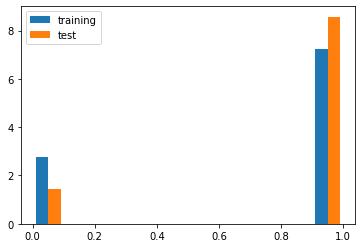

In [11]:
plt.hist(np.array([training_labels, test_labels]) , 10, density=True, histtype='bar', label=['training', 'test'])
plt.legend()

In [12]:
importance = pd.DataFrame({'feature': training_data.columns, 'importance': np.round(rf.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace=True)
importance

,feature,importance
40,tempDiffS,0.243
13,cumCasesLag1P100KC,0.155
25,geoDiffXdayNum,0.084
15,cumDeathsLag1P100KC,0.083
8,casesMD,0.069
0,dayNum,0.067
12,cumCasesLag1,0.050
16,deathsMD,0.043
24,geoDiff,0.042
14,cumDeathsLag1,0.040
